In [ ]:
# LSTM ?
# RNN ?
# find and load the data
# closing price
# how much price move with previos and current closing price
# fit with previous candle to current
# closing price

# --------------------------------------------------------------------
# Bitcoin price prediction
# 1. Find dataset with bitcoin price
# 2. Show Bitcoin chart
# 3. Convert data into Keras data format to feed model
# 4. devide data for train and test in a special way get data which is last month old for testing to know how accurate model is
# 5. difference beetween price???
# 6. try with standart metrix



In [37]:
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


In [5]:
# 1. Find dataset with bitcoin price

# Завантажуємо дані Bitcoin (BTC-USD — біткоїн до долара)
data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')

# Переглядаємо перші рядки
print(data.head())
print(data.tail())


C:\Users\Denys\AppData\Local\Temp\ipykernel_7516\1688787212.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-10-05  123513.476562  125559.210938  122191.960938  122419.671875   
2025-10-06  124752.531250  126198.070312  123196.046875  123510.453125   
2025-10-07  121451.382

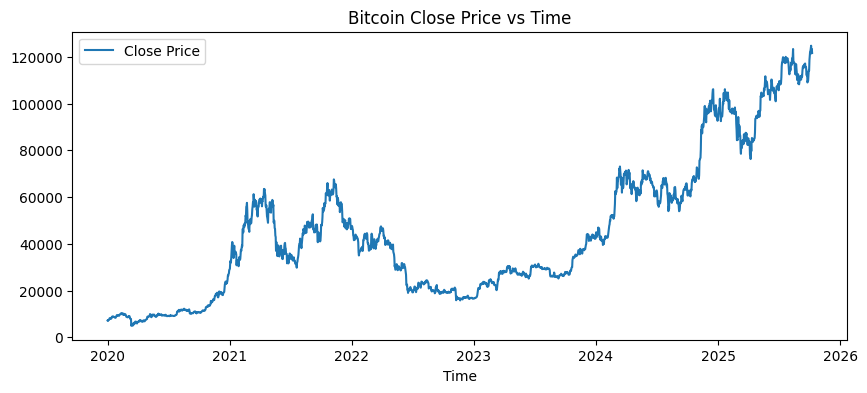

In [9]:
# 2. Show Bitcoin chart
plt.figure(figsize=(10,4))
plt.plot(data["Close"], label='Close Price')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.xlabel("Time")
plt.show()

In [34]:
# 3. Convert data into Keras data format to feed model

def make_dataset(series, seq_len=50, step=1):
    X, y = [], []
    for i in range(0, len(series) - seq_len, step):
        X.append(series[i:i+seq_len])
        y.append(series[i+seq_len])
    X = np.array(X)
    y = np.array(y)
    # LSTM в Keras очікує форму (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y


seq_len = 50

np_data = np.asarray(data["Close"])
np_data = np_data / 1000000
X, y = make_dataset(np_data, seq_len=seq_len)


print(X.shape)

(2059, 50, 1)


In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1482, 50, 1)
(412, 50, 1)


In [43]:
# 4) Побудова моделі
model = models.Sequential([
    layers.Input(shape=(seq_len, 1)),
    layers.LSTM(64, return_sequences=False),  # 64 прихованих одиниць
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # прогноз — одне значення
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3998e-04 - mae: 0.0096 - val_loss: 8.2202e-06 - val_mae: 0.0021
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.8490e-06 - mae: 0.0023 - val_loss: 7.1883e-06 - val_mae: 0.0019
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.1867e-06 - mae: 0.0022 - val_loss: 6.7082e-06 - val_mae: 0.0019
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.5806e-06 - mae: 0.0022 - val_loss: 9.1981e-06 - val_mae: 0.0025
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0320e-05 - mae: 0.0024 - val_loss: 9.9943e-06 - val_mae: 0.0027
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.6834e-06 - mae: 0.0021 - val_loss: 5.9594e-06 - val_mae: 0.0017
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.6706e-06 - mae: 0.0020 - val_loss: 6.7710e-06 - val_mae: 0.0019
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.1468e-06 - mae: 0.0021 - val_loss: 5.4589e-06 - val_mae: 0.0017


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6724e-06 - mae: 0.0014
Test MSE: 0.00000, Test MAE: 0.00144
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


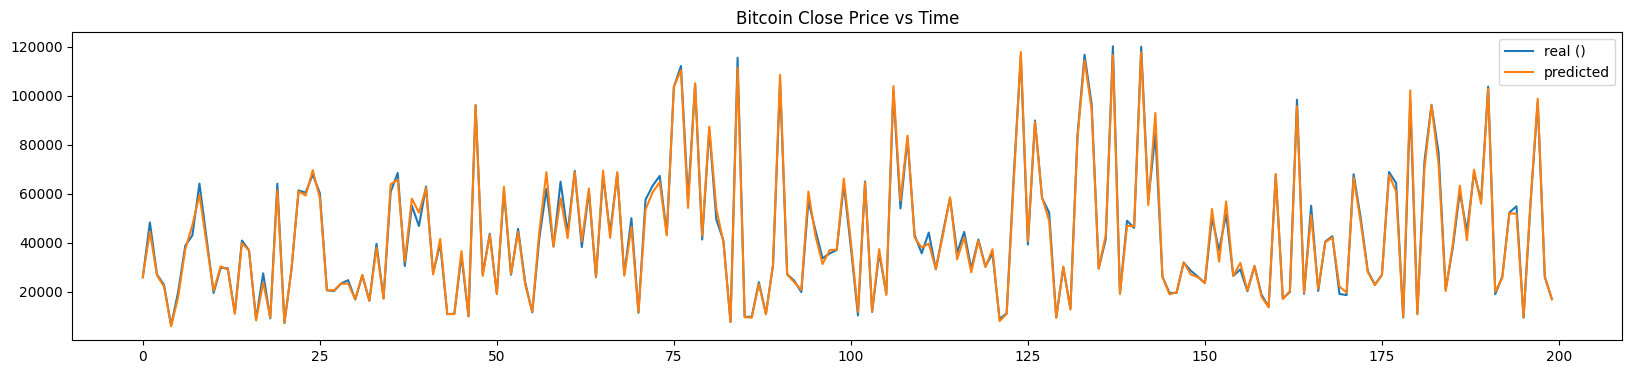

In [56]:
# 6) Оцінка та прогноз
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.5f}, Test MAE: {test_mae:.5f}")

# Робимо прогноз на тестовій частині
y_pred = model.predict(X_test).flatten()

# 7) Візуалізація: частина справжніх та прогноз
plt.figure(figsize=(20, 4))
plt.plot(y_test[:200] * 1000000, label='real ()')
plt.plot(y_pred[:200] * 1000000, label='predicted')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.show()